<h1>NOTE :</h1> 
<h2># code -> commented code </h2>
<h2>## comment -> comment on executed code </h2>

## importing necessary librabies and modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('datasets\clean.csv')

## read from the csv file

In [3]:
# train_set.columns.to_list()

## the training set has altogether 31 columns; 30 columns for the x- and y- coordinate of 15 facial key-points and 1 column for the image 

In [4]:
# train_set.info()

## we can see the data type for each columns ; 30 columns has float type and the last 1 column has image object

## Lets see how our image looks like

In [5]:
# sample_image = train_set['Image'][0]
# print(sample_image)
# print(type(sample_image))

## our image is a string object which contains the gray values (ranging from 0-255) for each pixels separated by space; 
## we need to convert the string type into a numpy array of these gray values; 
## later we reshape this array in order to represent a 96x96 grayscale image


## converting string object to three dimensional numpy array of shape(96, 96, 1)

In [6]:
train_set['Image'] = train_set['Image'].apply(lambda x : np.reshape(np.array(x.split(' '), dtype=int), (96, 96, 1)))

## applying lambda function to convert the str type into numpy array

In [7]:
# image = train_set['Image'][0]
# print(type(image))

## now our image is no more a string object but rather it is a three dimensional numpy array of size(96, 96, 1); 

## defining some functions

In [8]:
def plot_sample(image, keypoint, axis, title):
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='o', s=10)
    plt.title(title)

## this function is used to plot both image and the keypoints

In [9]:
def load_images(train_set):
    images = []
    for idx, image in train_set.iterrows():
        images.append(image['Image'])
    images = np.array(images)/255. # normalized the gray-value in the range 0-1
    return images

## this function is used to generate a list of images

In [10]:
def load_keypoints(train_set):
    temp = train_set.drop('Image', axis = 1) # dropping everything from the 'Image' column; doing so, only the keypoints remains
    keypoints = []
    for idx, keypoint in temp.iterrows():
        keypoints.append(keypoint)
    keypoints = np.array(keypoints, dtype = 'float')
    return keypoints

## this function is used to generate a list of keypoints

## lets prepare our training keypoints and images

In [11]:
train_keypoints = load_keypoints(train_set)
train_images = load_images(train_set)

## lets plot a sample image as well as the 15 facial keypoints

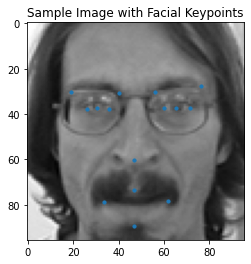

In [12]:
sample_image_index = 48

fig, axis = plt.subplots()
plot_sample(train_images[sample_image_index], train_keypoints[sample_image_index], axis, "Sample Image with Facial Keypoints")

## For training our neural network, the data-points might not be enough. So to increase the number of data points, we will perform data augmentation. Data augmentation is a technique to increase the diversity of our training set by applying random (but realistic) transformations such as image rotation, flipping, shifting, blurring, etc.
## Due to resoures limitation, we will only perform two types of augmentation : reflection and ..., after which we will be having around 8k instances of data; which will be enough for training the model.

## Augmentation 1 : Image Flipping or Reflection